#**Importations**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

#**load dataset**

In [6]:
df= pd.read_csv('/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/datasets/preprocessed_dataset.csv')

#**Training the models and choosing and saving the best model**

In [33]:
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Split the data (adjust this if you use cross-validation directly on the full df)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#print the shapes of the split data
print("X train ",X_train.shape)
print("X test ",X_test.shape)
print("y train ",y_train.shape)
print("y test ",y_test.shape)

# Define classifiers (up to 10 models)
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1500)),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Classifier', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
]

# Define scalers: None for no scaling, StandardScaler, and MinMaxScaler.
scalers = [
    ('No Scaling', None),
    ('Standard Scaling', StandardScaler()),
    ('MinMax Scaling', MinMaxScaler()),
]

results = {}

# Iterate over each scaler and classifier combination and save the best model at the end
for scaler_name, scaler in scalers:
    print(f"\nPipeline with {scaler_name}:")
    for clf_name, clf in classifiers:
        # Create pipeline steps; include scaler only if not None
        steps = []
        if scaler is not None:
            steps.append(('scaler', scaler))
        steps.append(('classifier', clf))
        pipeline = Pipeline(steps)

        # Train the model on the training set
        pipeline.fit(X_train, y_train)
        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        # Calculate test set accuracy
        acc = accuracy_score(y_test, y_pred)
        results[f"{clf_name} with {scaler_name}"] = acc

        print(f"{clf_name}: Test Accuracy = {acc:.4f}")


# save the best model which is Random forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n Random Forest: Test Accuracy = {acc:.4f}")
joblib.dump(model, '/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/models/best_model_random_forest.pkl')


X train  (1195, 10)
X test  (513, 10)
y train  (1195,)
y test  (513,)

Pipeline with No Scaling:
Logistic Regression: Test Accuracy = 0.9981
Random Forest: Test Accuracy = 0.9961
K-Nearest Neighbors: Test Accuracy = 0.9903
Support Vector Classifier: Test Accuracy = 0.7018
Decision Tree: Test Accuracy = 0.9961
Gaussian NB: Test Accuracy = 0.9903

Pipeline with Standard Scaling:
Logistic Regression: Test Accuracy = 0.9981
Random Forest: Test Accuracy = 0.9961
K-Nearest Neighbors: Test Accuracy = 0.9961
Support Vector Classifier: Test Accuracy = 0.9942
Decision Tree: Test Accuracy = 0.9961
Gaussian NB: Test Accuracy = 0.9922

Pipeline with MinMax Scaling:
Logistic Regression: Test Accuracy = 0.9981
Random Forest: Test Accuracy = 0.9961
K-Nearest Neighbors: Test Accuracy = 0.9981
Support Vector Classifier: Test Accuracy = 0.9981
Decision Tree: Test Accuracy = 0.9961
Gaussian NB: Test Accuracy = 0.9922

 Random Forest: Test Accuracy = 0.9961


['/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/models/best_model_random_forest.pkl']

#**Unsupervised learning**


##**Hierarchical clustering**
---

###**preprocessing**

In [96]:
sc=StandardScaler()
df_class=df["class"]
df_preprocessed=sc.fit_transform(df.drop("class",axis=1))


###**using the dendogram to find the optimal number of clusters**

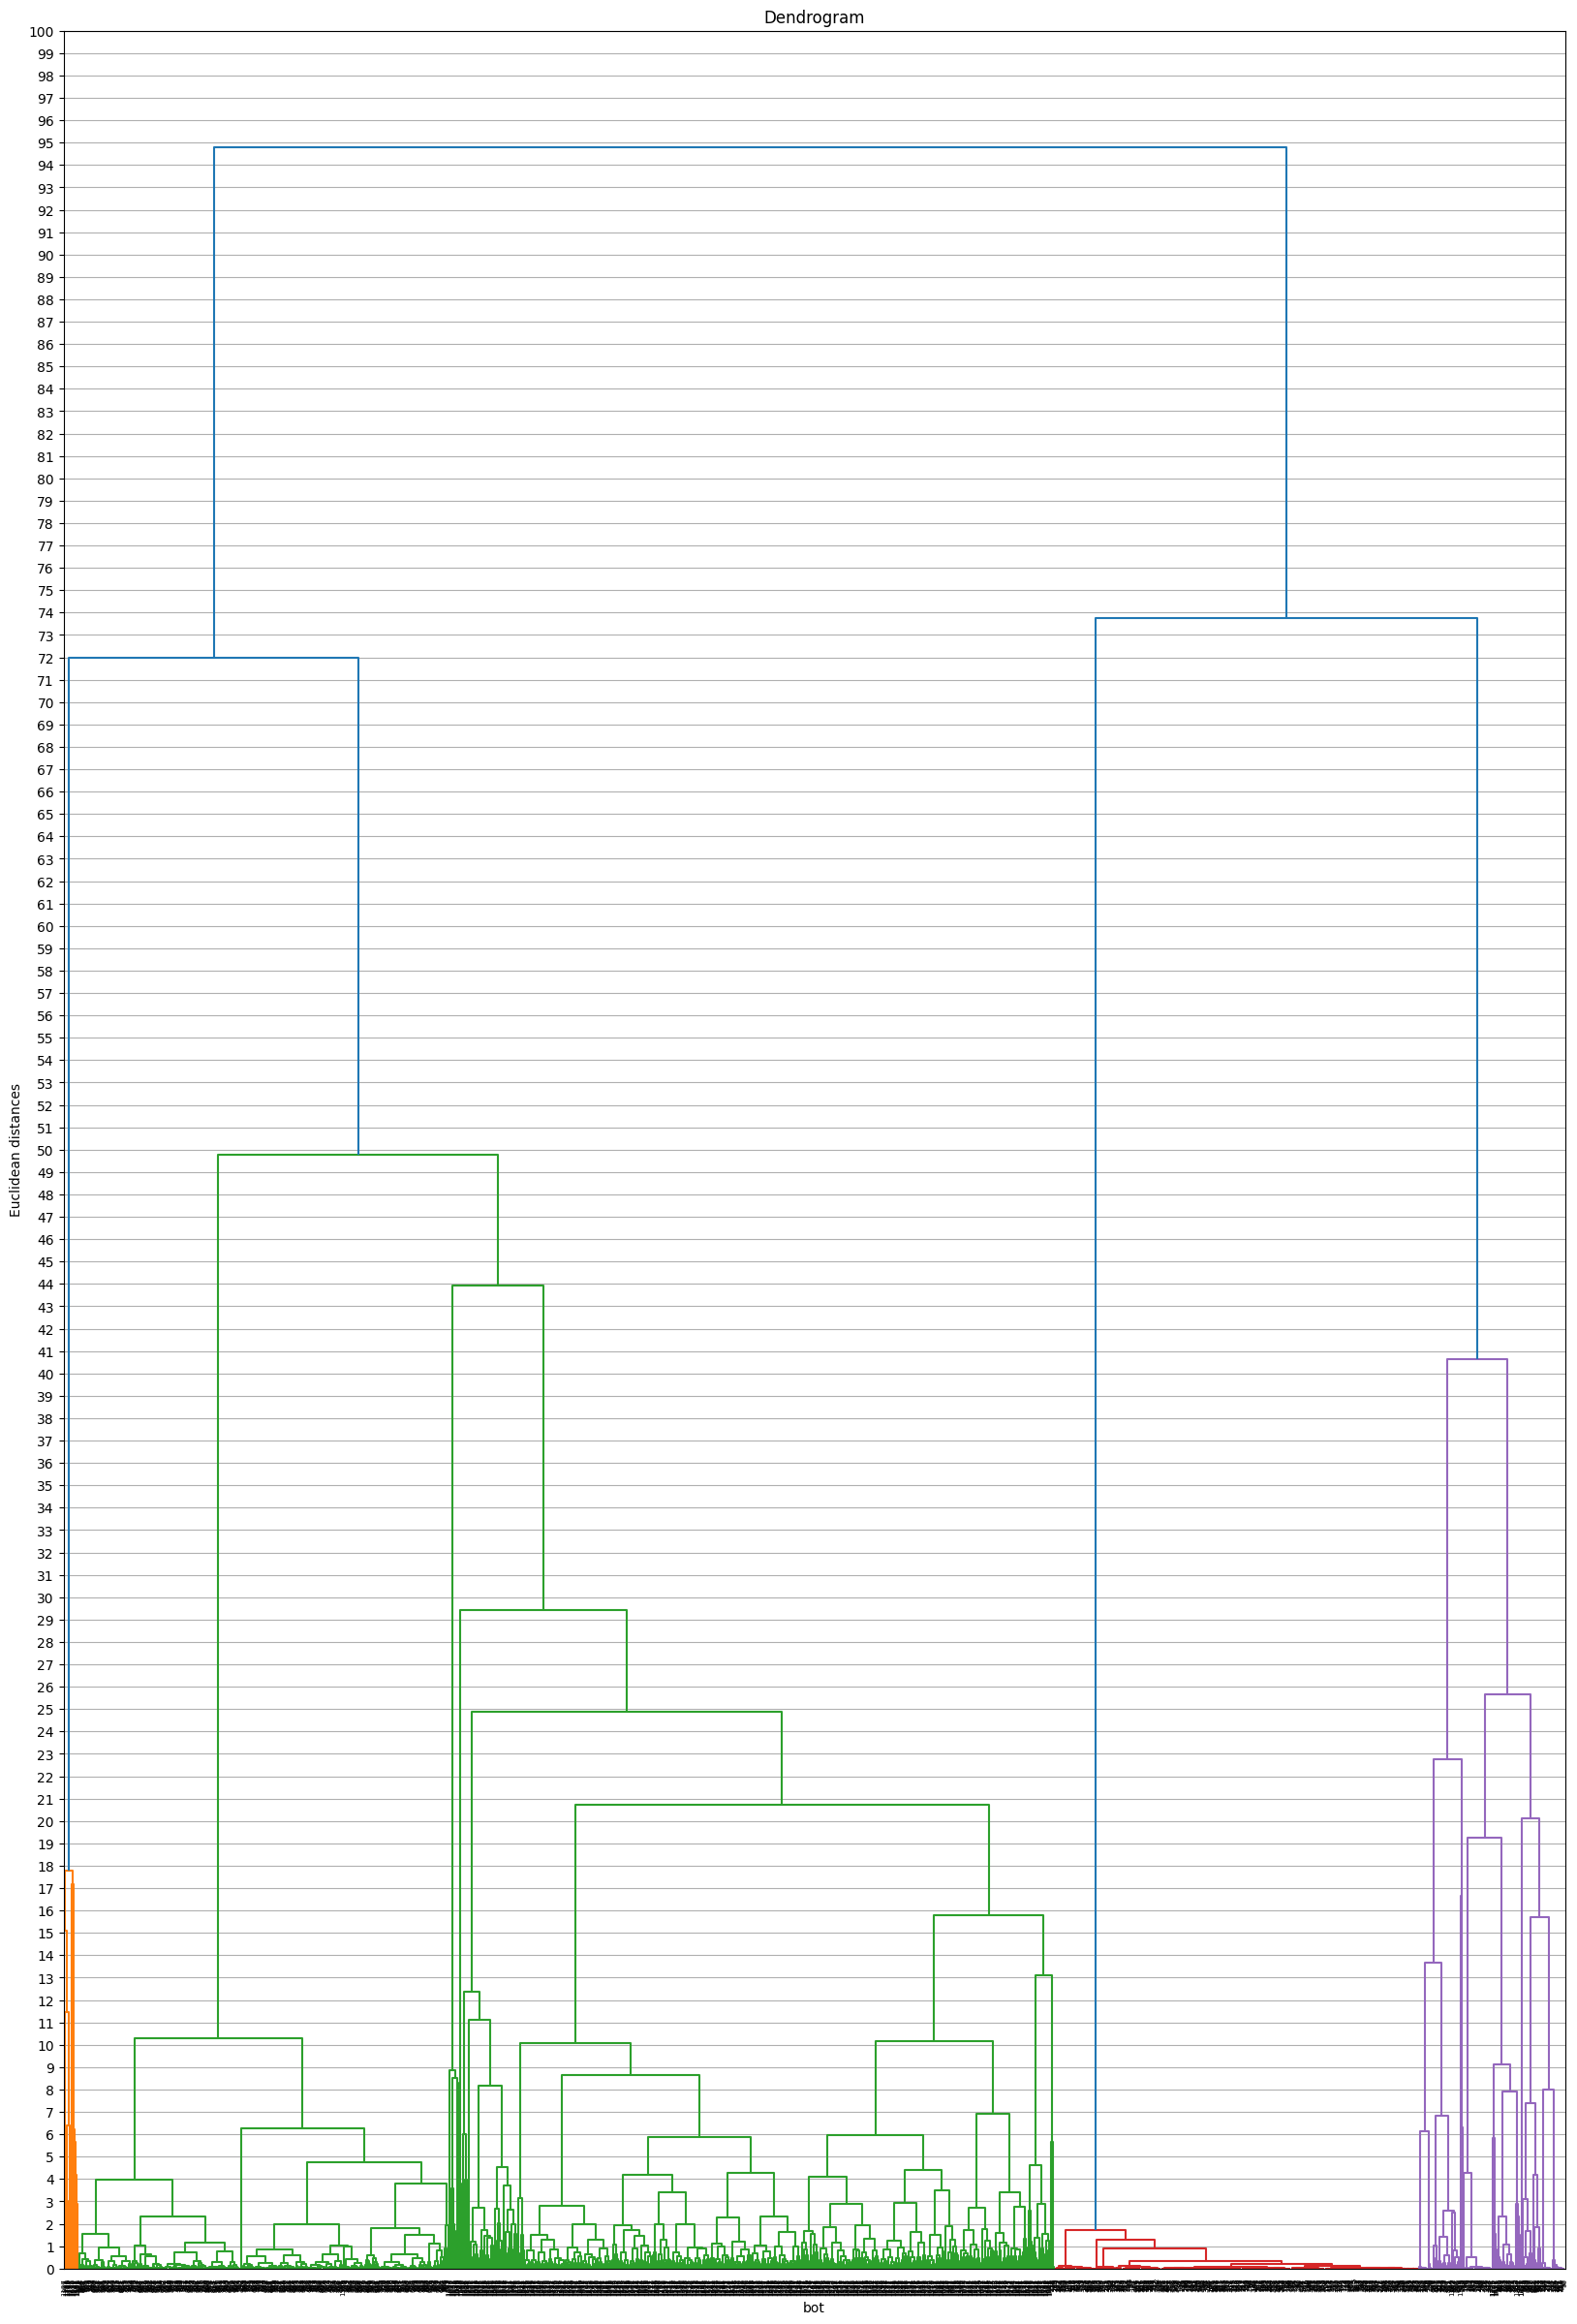

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,30))
Z = linkage(df_preprocessed, method="ward")
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("bot")
plt.ylabel("Euclidean distances")

# Get current axis and set y-ticks with a step of 1
ax = plt.gca()
ymax = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, ymax+1, 1))
plt.grid(True, axis='y')
plt.show()


###**train the model on the optimal number of clusters**
---
the fit predict creates a target variable

In [97]:
from sklearn.cluster import AgglomerativeClustering
optimal_k=4
model=AgglomerativeClustering(n_clusters=optimal_k,linkage="ward")
y_agglomerative_clusterring=model.fit_predict(df_preprocessed)

# add y to the df_class
df_class=pd.DataFrame(df_class)
df_class['prediction_agglomerative_clusterring']=y_agglomerative_clusterring


print(df_class.head())


   class  prediction_agglomerative_clusterring
0      0                                     2
1      0                                     2
2      0                                     2
3      0                                     2
4      0                                     2


###**compare the original classes and the predicted classes**

             class  prediction_agglomerative_clusterring
count  1708.000000                           1708.000000
mean      1.124707                              0.612412
std       0.832285                              0.884487
min       0.000000                              0.000000
25%       0.000000                              0.000000
50%       1.000000                              0.000000
75%       2.000000                              2.000000
max       2.000000                              3.000000
class                                   3
prediction_agglomerative_clusterring    4
dtype: int64


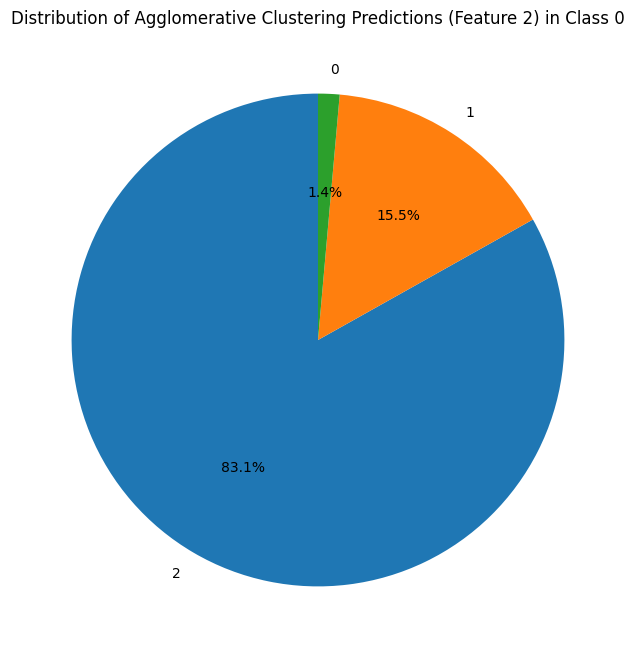

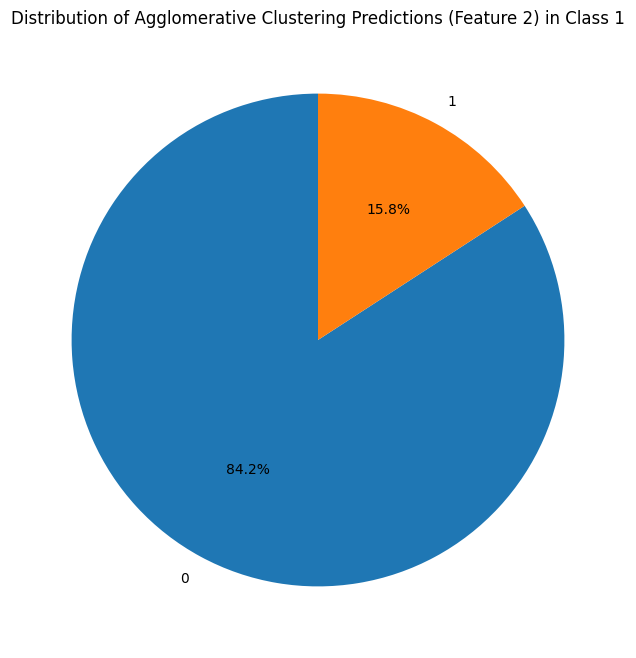

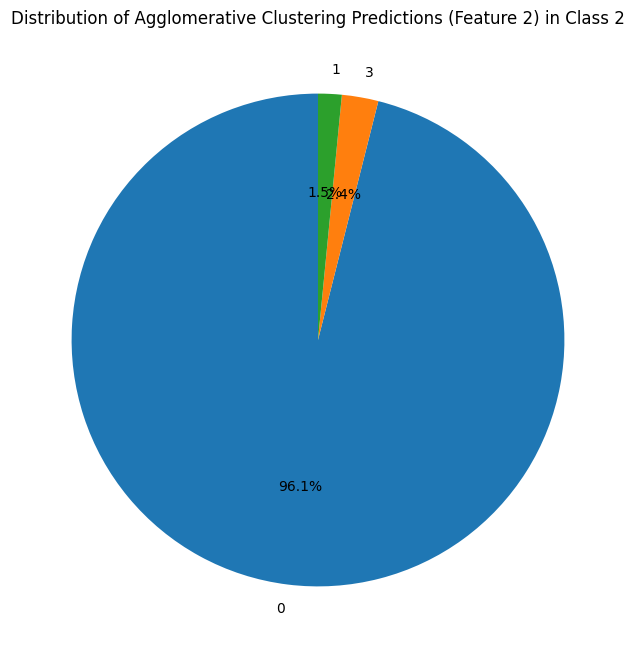

In [98]:


print(df_class.describe())
print(df_class.nunique())

#visualize the predicted classes among the class = 0

import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame with columns "class" and "prediction_agglomerative_clusterring"
# Filter rows where the class is 0
df_class0 = df_class[df_class['class'] == 0]

# Count the occurrences of each class in prediction_agglomerative_clusterring
counts = df_class0['prediction_agglomerative_clusterring'].value_counts()

# Plot a pie chart of the counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Agglomerative Clustering Predictions (Feature 2) in Class 0")
plt.show()






# Filter rows where the class is 1
df_class1 = df_class[df_class['class'] == 1]

# Count the occurrences of each class in prediction_agglomerative_clusterring
counts = df_class1['prediction_agglomerative_clusterring'].value_counts()

# Plot a pie chart of the counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Agglomerative Clustering Predictions (Feature 2) in Class 1")
plt.show()






# Filter rows where the class is 2
df_class2 = df_class[df_class['class'] == 2]

# Count the occurrences of each class in prediction_agglomerative_clusterring
counts = df_class2['prediction_agglomerative_clusterring'].value_counts()

# Plot a pie chart of the counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Agglomerative Clustering Predictions (Feature 2) in Class 2")
plt.show()


##**K means**
---

###**preprocessing**

In [103]:
sc=StandardScaler()
df_class=df["class"]
df_preprocessed=sc.fit_transform(df.drop("class",axis=1))

#save the scaler to models
joblib.dump(sc , '/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/models/scaler_for_unsupervised_learning.pkl')





['/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/models/scaler_for_unsupervised_learning.pkl']

###**using elbow method to find the optimal number of clusters**

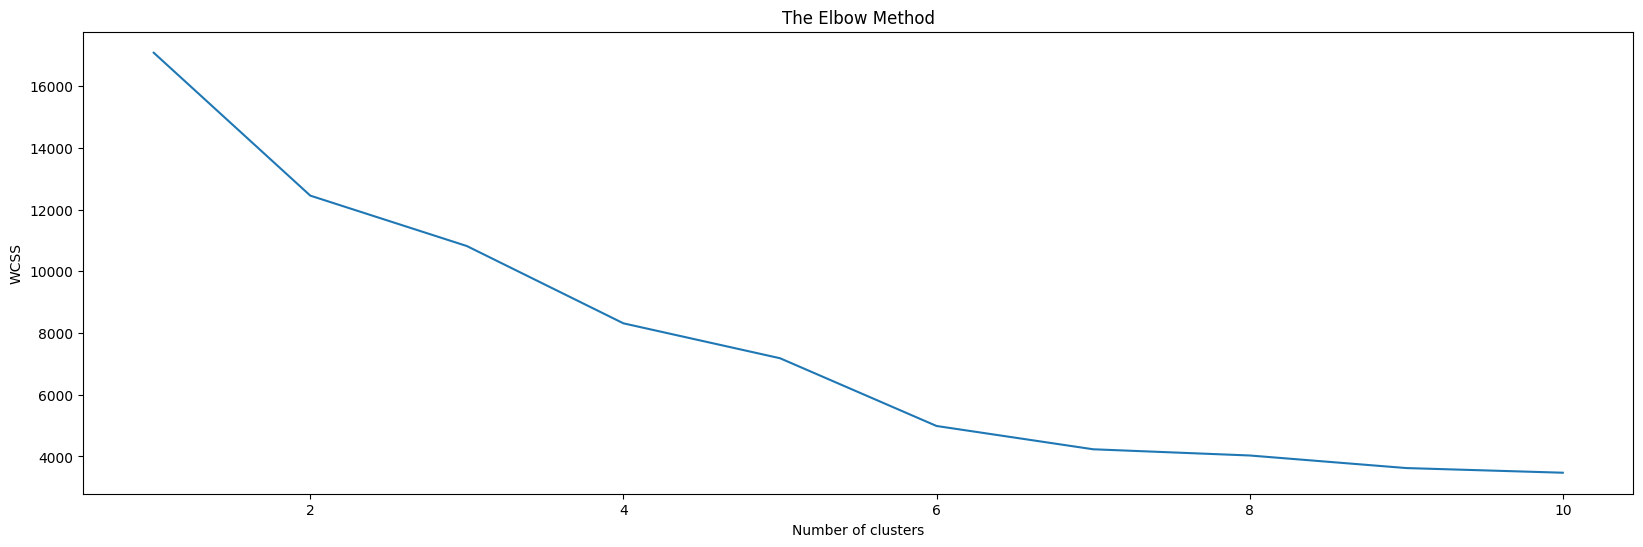

In [104]:

from sklearn.cluster import KMeans
wcss=[]
max_clusters=10
for i in range(1,max_clusters+1):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(df_preprocessed)
  wcss.append(kmeans.inertia_)

#plot the distances to the clusters for each number of clusters
plt.figure(figsize=(20,6))
plt.plot(range(1,max_clusters+1),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()



###**train the model on the optimal number of clusters**

the fit predict creates a target variable

In [105]:
import numpy as np
import joblib


optimal_k=4
model=KMeans(n_clusters=optimal_k,init="k-means++",random_state=42)
y_kmeans=model.fit_predict(df_preprocessed)


# add y to the df_class
df_class=pd.DataFrame(df_class)
df_class['prediction_k_means']=y_kmeans


print(df_class.head())

# save the model
joblib.dump(model, '/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/models/k_means_4_classes.pkl')

   class  prediction_k_means
0      0                   2
1      0                   2
2      0                   2
3      0                   2
4      0                   2


['/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/models/k_means_4_classes.pkl']

###**compare the original classes and the predicted classes**

             class  prediction_k_means
count  1708.000000         1708.000000
mean      1.124707            1.033372
std       0.832285            0.808239
min       0.000000            0.000000
25%       0.000000            0.000000
50%       1.000000            1.000000
75%       2.000000            2.000000
max       2.000000            3.000000
class                 3
prediction_k_means    4
dtype: int64


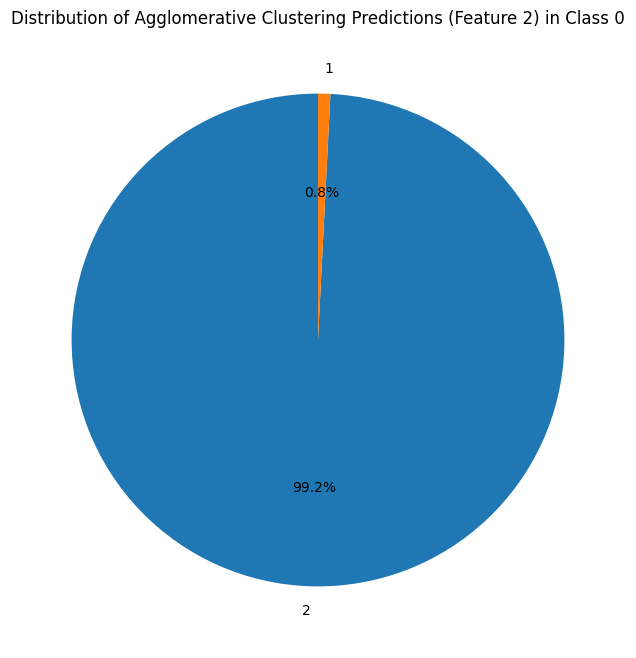

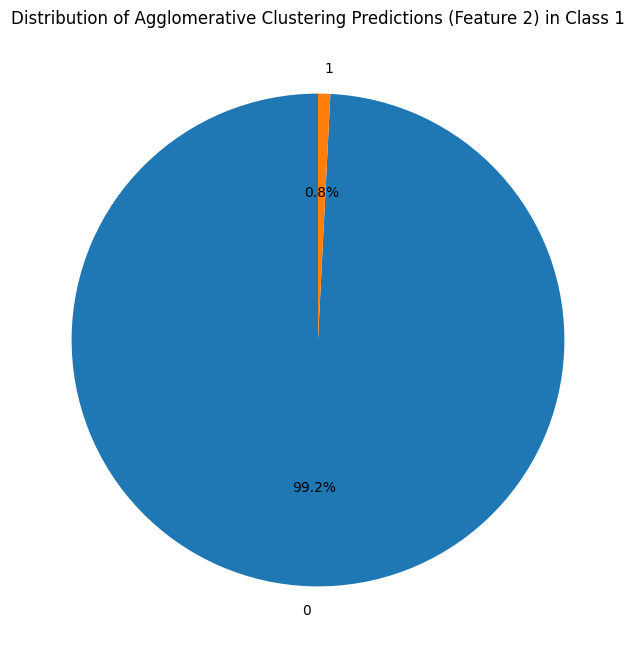

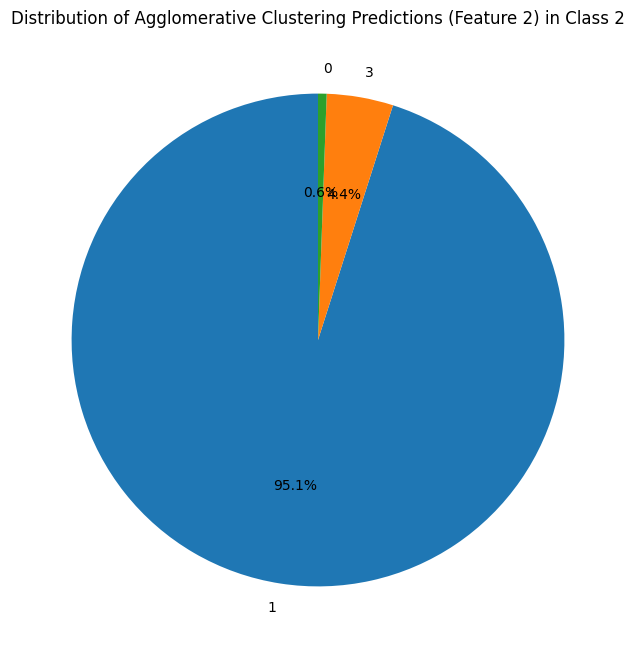

In [106]:


print(df_class.describe())
print(df_class.nunique())

#visualize the predicted classes among the class = 0

import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame with columns "class" and "prediction_agglomerative_clusterring"
# Filter rows where the class is 0
df_class0 = df_class[df_class['class'] == 0]

# Count the occurrences of each class in prediction_agglomerative_clusterring
counts = df_class0['prediction_k_means'].value_counts()

# Plot a pie chart of the counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Agglomerative Clustering Predictions (Feature 2) in Class 0")
plt.show()






# Filter rows where the class is 1
df_class1 = df_class[df_class['class'] == 1]

# Count the occurrences of each class in prediction_agglomerative_clusterring
counts = df_class1['prediction_k_means'].value_counts()

# Plot a pie chart of the counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Agglomerative Clustering Predictions (Feature 2) in Class 1")
plt.show()






# Filter rows where the class is 2
df_class2 = df_class[df_class['class'] == 2]

# Count the occurrences of each class in prediction_agglomerative_clusterring
counts = df_class2['prediction_k_means'].value_counts()

# Plot a pie chart of the counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Agglomerative Clustering Predictions (Feature 2) in Class 2")
plt.show()
